bandwidth_data=[205.0, 176.0, 183.0, 184.0, 211.0, 180.0, 175.0, 189.0, 195.0, 216.0, 170.0, 177.0, 189.0, 163.0, 214.0, 183.0, 186.0, 190.0, 178.0, 188.0, 188.0, 187.0]

|  | 1s | 3s | 5s | 7s | 9s | 12s | 15s | 20s | AVG |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Bandwidth | 205.0 Mbits/s | 183.0 Mbits/s | 211.0 Mbits/s | 175.0 Mbits/s | 195.0 Mbits/s | 170.0 Mbits/s | 214.0 Mbits/s | 188.0 Mbits/s |188.0 Mbits/s |


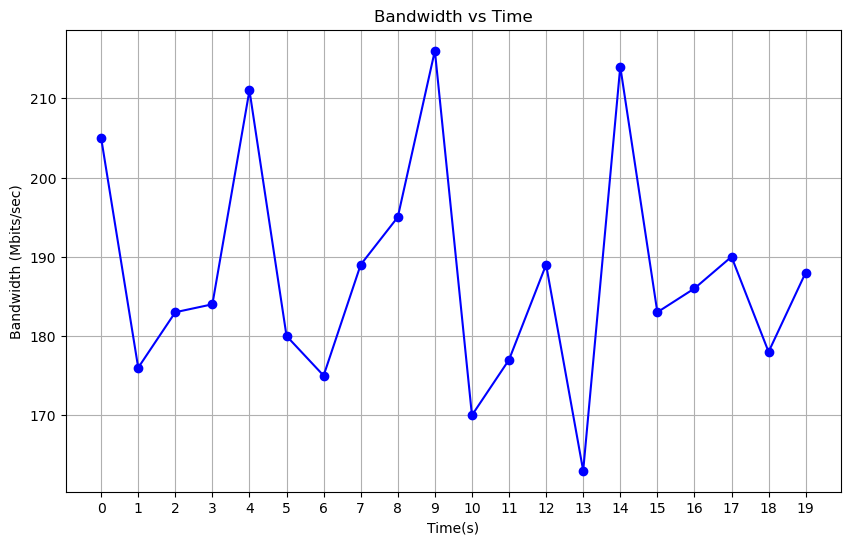

In [1]:
import re

def extract_bandwidth(text):
    # extract Bandwidth (get Mbits/sec data)
    #pattern = r'(\d+\.+\d+)\s+Mbits/sec' #for float
    pattern = r'(\d+)\s+Mbits/sec' #for int
    bandwidths = re.findall(pattern, text)

    # return an array
    return [float(bw) for bw in bandwidths]

# demo
text_data = """

[  5] local 192.168.76.131 port 50908 connected to 10.68.75.53 port 5201
[ ID] Interval           Transfer     Bitrate         Retr  Cwnd
[  5]   0.00-1.00   sec  24.5 MBytes   205 Mbits/sec    0    160 KBytes
[  5]   1.00-2.00   sec  20.9 MBytes   176 Mbits/sec    0    191 KBytes
[  5]   2.00-3.00   sec  21.8 MBytes   183 Mbits/sec    0    188 KBytes
[  5]   3.00-4.00   sec  21.9 MBytes   184 Mbits/sec    0    114 KBytes
[  5]   4.00-5.00   sec  25.2 MBytes   211 Mbits/sec    0    151 KBytes
[  5]   5.00-6.00   sec  21.5 MBytes   180 Mbits/sec    0    225 KBytes
[  5]   6.00-7.00   sec  20.9 MBytes   175 Mbits/sec    0    110 KBytes
[  5]   7.00-8.00   sec  22.5 MBytes   189 Mbits/sec    0    185 KBytes
[  5]   8.00-9.00   sec  23.3 MBytes   195 Mbits/sec    0    220 KBytes
[  5]   9.00-10.00  sec  25.7 MBytes   216 Mbits/sec    0    191 KBytes
[  5]  10.00-11.00  sec  20.3 MBytes   170 Mbits/sec    0   79.8 KBytes
[  5]  11.00-12.00  sec  21.0 MBytes   177 Mbits/sec    0    154 KBytes
[  5]  12.00-13.00  sec  22.6 MBytes   189 Mbits/sec    0    157 KBytes
[  5]  13.00-14.00  sec  19.5 MBytes   163 Mbits/sec    0   5.70 KBytes
[  5]  14.00-15.00  sec  25.5 MBytes   214 Mbits/sec    0    157 KBytes
[  5]  15.00-16.00  sec  21.8 MBytes   183 Mbits/sec    0    148 KBytes
[  5]  16.00-17.00  sec  22.1 MBytes   186 Mbits/sec    0    188 KBytes
[  5]  17.00-18.00  sec  22.7 MBytes   190 Mbits/sec    0    154 KBytes
[  5]  18.00-19.00  sec  21.2 MBytes   178 Mbits/sec    0    228 KBytes
[  5]  19.00-20.00  sec  22.5 MBytes   188 Mbits/sec    0    134 KBytes
- - - - - - - - - - - - - - - - - - - - - - - - -
[ ID] Interval           Transfer     Bitrate         Retr
[  5]   0.00-20.00  sec   447 MBytes   188 Mbits/sec    0             sender
[  5]   0.00-20.00  sec   446 MBytes   187 Mbits/sec                  receiver

"""

# extract the bandwith
bandwidth_data = extract_bandwidth(text_data)
if len(bandwidth_data)!=22:
    print("len=",len(bandwidth_data))
    print(bandwidth_data)
else:
    print(f"bandwidth_data={bandwidth_data}")
    print(f"\n|  | 1s | 3s | 5s | 7s | 9s | 12s | 15s | 20s | AVG |\n| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |\n| Bandwidth | {bandwidth_data[0]} Mbits/s | {bandwidth_data[2]} Mbits/s | {bandwidth_data[4]} Mbits/s | {bandwidth_data[6]} Mbits/s | {bandwidth_data[8]} Mbits/s | {bandwidth_data[10]} Mbits/s | {bandwidth_data[14]} Mbits/s | {bandwidth_data[19]} Mbits/s |{bandwidth_data[20]} Mbits/s |")
import matplotlib.pyplot as plt

def plot_bandwidth_array(bandwidth_array):
    # get the x
    x = range(len(bandwidth_array)-2)

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, bandwidth_array[0:-2], marker='o', linestyle='-', color='b')
    plt.xlabel('Time(s)')
    plt.ylabel('Bandwidth (Mbits/sec)')
    plt.title('Bandwidth vs Time')
    #
    plt.xticks(x)
    plt.grid(True)
    plt.show()

# plot
bandwidth_data = bandwidth_data
plot_bandwidth_array(bandwidth_data)


Cwnd_data=[160.0, 191.0, 188.0, 114.0, 151.0, 225.0, 110.0, 185.0, 220.0, 191.0, 80.0, 154.0, 157.0, 6.0, 157.0, 148.0, 188.0, 154.0, 228.0, 134.0]

|  | 1s | 3s | 5s | 7s | 9s | 12s | 15s | 20s  |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Cwnd | 160.0 KBytes | 188.0 KBytes | 151.0 KBytes | 110.0 KBytes | 220.0 KBytes | 80.0 KBytes | 157.0 KBytes | 134.0 KBytes 


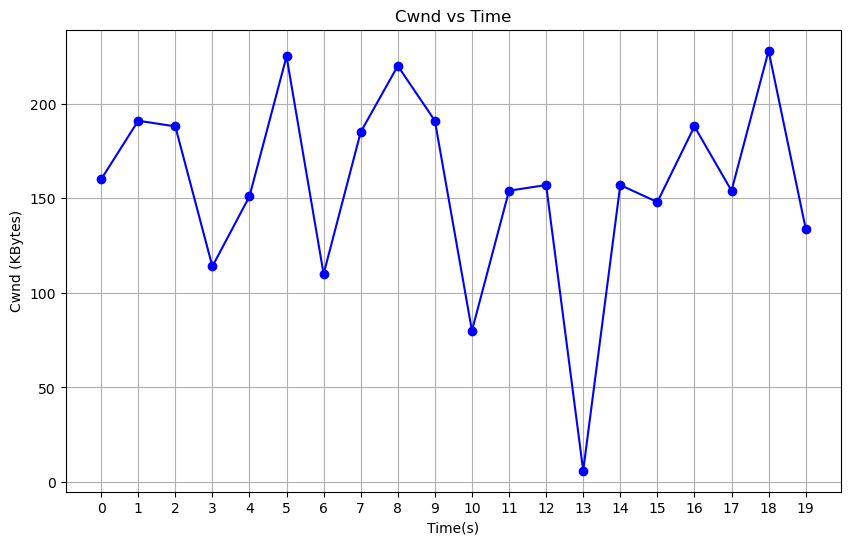

In [2]:
#extract the CWS
import re

def extract_Cwnd(text):
    # extract Bandwidth (get Mbits/sec data)
    #pattern = r'(\d+\.+\d+)\s+KBytes' #for float
    pattern = r'(\d+)\s+KBytes' #for int
    bandwidths = re.findall(pattern, text)

    # return an array
    return [float(bw) for bw in bandwidths]

# demo
text_data = """

[  5] local 192.168.76.131 port 50908 connected to 10.68.75.53 port 5201
[ ID] Interval           Transfer     Bitrate         Retr  Cwnd
[  5]   0.00-1.00   sec  24.5 MBytes   205 Mbits/sec    0    160 KBytes
[  5]   1.00-2.00   sec  20.9 MBytes   176 Mbits/sec    0    191 KBytes
[  5]   2.00-3.00   sec  21.8 MBytes   183 Mbits/sec    0    188 KBytes
[  5]   3.00-4.00   sec  21.9 MBytes   184 Mbits/sec    0    114 KBytes
[  5]   4.00-5.00   sec  25.2 MBytes   211 Mbits/sec    0    151 KBytes
[  5]   5.00-6.00   sec  21.5 MBytes   180 Mbits/sec    0    225 KBytes
[  5]   6.00-7.00   sec  20.9 MBytes   175 Mbits/sec    0    110 KBytes
[  5]   7.00-8.00   sec  22.5 MBytes   189 Mbits/sec    0    185 KBytes
[  5]   8.00-9.00   sec  23.3 MBytes   195 Mbits/sec    0    220 KBytes
[  5]   9.00-10.00  sec  25.7 MBytes   216 Mbits/sec    0    191 KBytes
[  5]  10.00-11.00  sec  20.3 MBytes   170 Mbits/sec    0   80 KBytes
[  5]  11.00-12.00  sec  21.0 MBytes   177 Mbits/sec    0    154 KBytes
[  5]  12.00-13.00  sec  22.6 MBytes   189 Mbits/sec    0    157 KBytes
[  5]  13.00-14.00  sec  19.5 MBytes   163 Mbits/sec    0   6 KBytes
[  5]  14.00-15.00  sec  25.5 MBytes   214 Mbits/sec    0    157 KBytes
[  5]  15.00-16.00  sec  21.8 MBytes   183 Mbits/sec    0    148 KBytes
[  5]  16.00-17.00  sec  22.1 MBytes   186 Mbits/sec    0    188 KBytes
[  5]  17.00-18.00  sec  22.7 MBytes   190 Mbits/sec    0    154 KBytes
[  5]  18.00-19.00  sec  21.2 MBytes   178 Mbits/sec    0    228 KBytes
[  5]  19.00-20.00  sec  22.5 MBytes   188 Mbits/sec    0    134 KBytes
- - - - - - - - - - - - - - - - - - - - - - - - -
[ ID] Interval           Transfer     Bitrate         Retr
[  5]   0.00-20.00  sec   447 MBytes   188 Mbits/sec    0             sender
[  5]   0.00-20.00  sec   446 MBytes   187 Mbits/sec                  receiver

"""

# extract the bandwith
bandwidth_data = extract_Cwnd(text_data)
if len(bandwidth_data)!=20:
    print("len=",len(bandwidth_data))
    print(bandwidth_data)
else:
    print(f"Cwnd_data={bandwidth_data}")
    print(f"\n|  | 1s | 3s | 5s | 7s | 9s | 12s | 15s | 20s  |\n| --- | --- | --- | --- | --- | --- | --- | --- | --- |\n| Cwnd | {bandwidth_data[0]} KBytes | {bandwidth_data[2]} KBytes | {bandwidth_data[4]} KBytes | {bandwidth_data[6]} KBytes | {bandwidth_data[8]} KBytes | {bandwidth_data[10]} KBytes | {bandwidth_data[14]} KBytes | {bandwidth_data[19]} KBytes ")
import matplotlib.pyplot as plt

def plot_bandwidth_array(bandwidth_array):
    # get the x
    x = range(len(bandwidth_array))

    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, bandwidth_array, marker='o', linestyle='-', color='b')
    plt.xlabel('Time(s)')
    plt.ylabel('Cwnd (KBytes)')
    plt.title('Cwnd vs Time')
    #
    plt.xticks(x)
    plt.grid(True)
    plt.show()

# plot
bandwidth_data = bandwidth_data
plot_bandwidth_array(bandwidth_data)


In [3]:
import json
import numpy as np
#Read cubic delay json file
with open("cubic_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_cubic =[]
var_cubic = []
cwnd_cubic =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_cubic.append(rtt)
    cwnd_cubic.append(window_size/1000)
    var_cubic.append(rtt_variance)

print(f"rtt_cubic：{rtt_cubic}")
print(f"cwnd_cubic：{cwnd_cubic}")
print(f"var_cubic:{var_cubic}")

rtt_cubic：[516, 814, 1576, 1126, 1353, 770, 767, 3808, 870, 554, 2114, 1098, 956, 1925, 790, 526, 2596, 718, 505, 1066]
cwnd_cubic：[65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7]
var_cubic:[35, 69, 333, 195, 435, 67, 80, 704, 127, 182, 63, 148, 242, 269, 159, 112, 563, 184, 108, 281]


In [4]:
import json
import numpy as np
#Read cubic delay json file
with open("bbr_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_cubic =[]
var_cubic = []
cwnd_cubic =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_cubic.append(rtt)
    cwnd_cubic.append(window_size/1000)
    var_cubic.append(rtt_variance)

print(f"rtt_bbr：{rtt_cubic}\n")
print(f"cwnd_bbr：{cwnd_cubic}\n")
print(f"var_bbr:{var_cubic}\n")

rtt_bbr：[610, 917, 532, 3170, 959, 567, 1947, 639, 757, 812, 904, 374, 1054, 1149, 997, 739, 774, 2745, 818, 1644]

cwnd_bbr：[277.4, 271.56, 268.64, 242.36, 248.2, 289.08, 262.8, 246.74, 248.2, 245.28, 160.6, 259.88, 195.64, 204.4, 224.84, 230.68, 227.76, 230.68, 262.8, 251.12]

var_bbr:[45, 69, 118, 99, 371, 54, 127, 115, 109, 162, 83, 29, 103, 124, 185, 150, 56, 373, 126, 73]



In [5]:
import json
import numpy as np
#Read cubic delay json file
with open("reno_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_reno =[]
cwnd_reno = []
var_reno =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_reno.append(rtt)
    cwnd_reno.append(window_size/1000)
    var_reno.append(rtt_variance)

print(f"rtt_reno:{rtt_reno}\n")
print(f"cwnd_reno:{cwnd_reno}\n")
print(f"var_reno:{var_reno}\n")

rtt_reno:[585, 768, 873, 822, 3335, 790, 661, 2828, 973, 1120, 778, 745, 1195, 436, 842, 841, 8583, 810, 842, 795]

cwnd_reno:[135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78]

var_reno:[61, 279, 168, 141, 543, 119, 213, 218, 145, 150, 95, 123, 119, 45, 116, 117, 2418, 164, 200, 119]



In [6]:
import json
import numpy as np
#Read cubic delay json file
with open("vegas_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_vegas =[]
cwnd_vegas = []
var_vegas =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_vegas.append(rtt)
    cwnd_vegas.append(window_size/1000)
    var_vegas.append(rtt_variance)

print(f"rtt_vegas:{rtt_vegas}\n")
print(f"cwnd_vegas:{cwnd_vegas}\n")
print(f"var_vegas:{var_vegas}\n")

rtt_vegas:[558, 454, 659, 1140, 782, 718, 1238, 715, 1383, 629, 1145, 2865, 2717, 649, 1010, 401, 847, 556, 835, 1226]

cwnd_vegas:[43.8, 51.1, 62.78, 74.46, 70.08, 75.92, 84.68, 86.14, 99.28, 108.04, 116.8, 122.64, 127.02, 138.7, 146.0, 154.76, 164.98, 181.04, 188.34, 195.64]

var_vegas:[142, 55, 191, 229, 137, 82, 143, 72, 95, 104, 139, 249, 361, 85, 202, 57, 79, 81, 136, 224]



In [7]:
import json
import numpy as np
#Read cubic delay json file
with open("wired_vegas_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_vegas =[]
cwnd_vegas = []
var_vegas =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_vegas.append(rtt)
    cwnd_vegas.append(window_size/1000)
    var_vegas.append(rtt_variance)

print(f"wired_rtt_vegas:{rtt_vegas}\n")
print(f"wired_cwnd_vegas:{cwnd_vegas}\n")
print(f"wired_var_vegas:{var_vegas}\n")

wired_rtt_vegas:[374, 421, 399, 611, 840, 539, 351, 346, 365, 407, 420, 390, 494, 470, 468, 430, 421, 270, 397, 386]

wired_cwnd_vegas:[7.3, 4.38, 5.84, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 2.92, 4.38, 2.92, 4.38, 4.38, 5.84, 2.92, 4.38]

wired_var_vegas:[60, 63, 75, 159, 694, 113, 74, 39, 55, 78, 54, 92, 90, 138, 144, 199, 107, 47, 52, 48]



In [8]:
import json
import numpy as np
#Read cubic delay json file
with open("wired_reno_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_reno =[]
cwnd_reno = []
var_reno =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_reno.append(rtt)
    cwnd_reno.append(window_size/1000)
    var_reno.append(rtt_variance)

print(f"rtt_reno:{rtt_reno}\n")
print(f"cwnd_reno:{cwnd_reno}\n")
print(f"var_reno:{var_reno}\n")

rtt_reno:[5254, 2673, 2637, 4265, 2665, 2712, 1643, 3152, 3602, 2518, 1643, 2944, 2379, 4592, 1348, 2218, 2100, 1820, 1744, 5342]

cwnd_reno:[128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48]

var_reno:[524, 183, 169, 199, 273, 367, 70, 206, 115, 189, 65, 144, 584, 302, 43, 194, 302, 308, 62, 200]



In [9]:
import json
import numpy as np
#Read cubic delay json file
with open("wired_cubic_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_cubic =[]
var_cubic = []
cwnd_cubic =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_cubic.append(rtt)
    cwnd_cubic.append(window_size/1000)
    var_cubic.append(rtt_variance)

print(f"rtt_cubic：{rtt_cubic}")
print(f"cwnd_cubic：{cwnd_cubic}")
print(f"var_cubic:{var_cubic}")

rtt_cubic：[1456, 2150, 1517, 1682, 1633, 1193, 2367, 1977, 2361, 6190, 1187, 3545, 1600, 1553, 1508, 2939, 3908, 2759, 3135, 1612]
cwnd_cubic：[189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8]
var_cubic:[272, 678, 674, 658, 36, 114, 400, 260, 218, 428, 120, 555, 147, 56, 68, 177, 355, 201, 218, 239]


In [10]:
import json
import numpy as np
#Read cubic delay json file
with open("wired_bbr_delay.json", 'r') as cubic_file:
    cubic_data = json.load(cubic_file)

intervals = cubic_data['intervals']
rtt_bbr =[]
var_bbr = []
cwnd_bbr =[]

for interval in intervals:
    rtt = interval['streams'][0]['rtt']
    rtt_variance = interval['streams'][0]['rttvar']
    window_size = interval['streams'][0]['snd_cwnd']
    rtt_bbr.append(rtt)
    cwnd_bbr.append(window_size/1000)
    var_bbr.append(rtt_variance)

print(f"rtt_bbr：{rtt_bbr}\n")
print(f"cwnd_bbr：{cwnd_bbr}\n")
print(f"var_bbr:{var_bbr}\n")

rtt_bbr：[3006, 3827, 1542, 1288, 2312, 1733, 3115, 4205, 4096, 1806, 2426, 3196, 2018, 6220, 2092, 2369, 3282, 3433, 1950, 2129]

cwnd_bbr：[163.52, 105.12, 210.24, 122.64, 262.8, 236.52, 157.68, 128.48, 151.84, 157.68, 251.12, 148.92, 166.44, 169.36, 183.96, 172.28, 172.28, 68.62, 166.44, 201.48]

var_bbr:[653, 281, 46, 579, 182, 21, 155, 345, 296, 139, 64, 253, 226, 748, 96, 98, 240, 387, 317, 304]



In [11]:
wireless_bbr_bandwidth_data=[85.2, 76.6, 70.4, 62.7, 76.6, 83.0, 76.6, 76.3, 76.6, 76.3, 96.6, 77.6, 96.6, 77.1, 76.3, 83.8, 76.6, 77.3, 83.0, 90.2]
wireless_bbr_Cwnd_data=[234.0, 248.0, 240.0, 205.0, 222.0, 251.0, 240.0, 251.0, 234.0, 231.0, 225.0, 237.0, 168.0, 190.0, 185.0, 220.0, 220.0, 231.0, 154.0, 248.0]

wireless_cubic_bandwidth_data=[72.6, 85.6, 79.4, 85.8, 35.5, 80.2, 89.2, 85.6, 89.7, 87.9, 83.8, 84.3, 81.7, 79.4, 80.7, 80.9, 81.2, 77.1, 75.3, 76.8]
wireless_cubic_Cwnd_data=[64.2, 64.2, 64.2, 64.2, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0, 67.0]

wireless_reno_bandwidth_data=[75.6, 83.5, 91.0, 89.4, 79.9, 72.5, 83.5, 80.4, 79.9, 77.9, 92.8, 87.6, 80.7, 82.7, 81.7, 82.5, 86.8, 91.2, 82.2, 79.4]
wireless_reno_Cwnd_data=[141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0, 141.0]

wireless_vegas_bandwidth_data=[68.4, 65.0, 68.4, 62.2, 55.8, 73.0, 78.6, 43.2, 80.2, 90.2, 67.3, 77.6, 87.1, 96.9, 82.2, 85.8, 92.7, 93.3, 89.9, 90.5]
wireless_vegas_Cwnd_data=[221.0, 231.0, 241.0, 242.0, 235.0, 242.0, 235.0, 231.0, 237.0, 244.0, 235.0, 241.0, 257.0, 238.0, 214.0, 217.0, 241.0, 238.0, 190.0, 182.0]




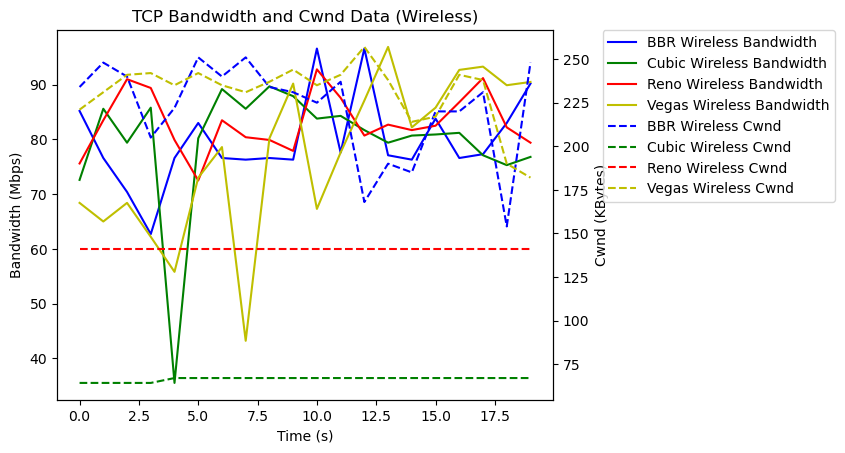

In [12]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wireless_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wireless_bbr_bandwidth_data, 'b-', label='BBR Wireless Bandwidth')
ax1.plot(x, wireless_cubic_bandwidth_data, 'g-', label='Cubic Wireless Bandwidth')
ax1.plot(x, wireless_reno_bandwidth_data, 'r-', label='Reno Wireless Bandwidth')
ax1.plot(x, wireless_vegas_bandwidth_data, 'y-', label='Vegas Wireless Bandwidth')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bandwidth (Mbps)', color='k')
ax1.tick_params(axis='y')

# 创建右侧的 Cwnd 轴
ax2 = ax1.twinx()
ax2.plot(x, wireless_bbr_Cwnd_data, 'b--', label='BBR Wireless Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wireless_cubic_Cwnd_data, 'g--', label='Cubic Wireless Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wireless_reno_Cwnd_data, 'r--', label='Reno Wireless Cwnd')  
ax2.plot(x, wireless_vegas_Cwnd_data, 'y--', label='Vegas Wireless Cwnd')  
ax2.set_ylabel('Cwnd (KBytes)', color='k')
ax2.tick_params(axis='y')

# 获取 ax1 和 ax2 中的所有线条和标签
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(lines1 + lines2, labels1 + labels2, loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad=0.)

# 添加图例
# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
# plt.legend(loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad = 0.)

# 设置标题
plt.title('TCP Bandwidth and Cwnd Data (Wireless)')

# 显示图形
plt.show()


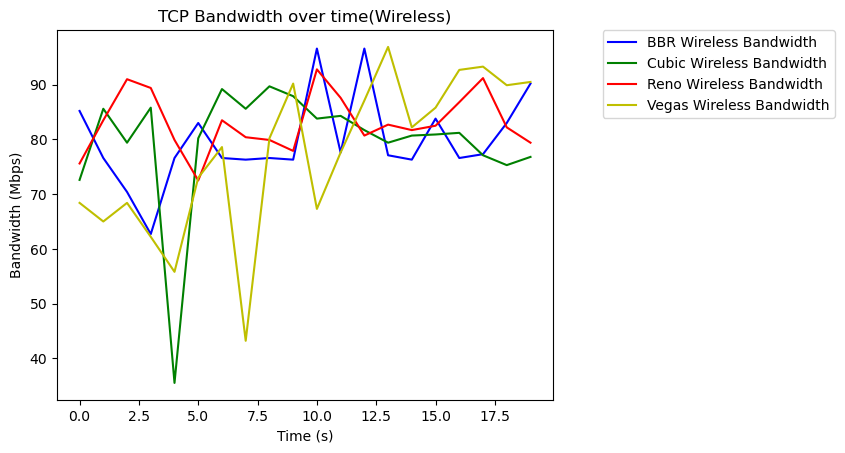

In [13]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wireless_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wireless_bbr_bandwidth_data, 'b-', label='BBR Wireless Bandwidth')
ax1.plot(x, wireless_cubic_bandwidth_data, 'g-', label='Cubic Wireless Bandwidth')
ax1.plot(x, wireless_reno_bandwidth_data, 'r-', label='Reno Wireless Bandwidth')
ax1.plot(x, wireless_vegas_bandwidth_data, 'y-', label='Vegas Wireless Bandwidth')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bandwidth (Mbps)', color='k')
ax1.tick_params(axis='y')

# 添加图例
# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.legend(loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad = 0.)

# 设置标题
plt.title('TCP Bandwidth over time(Wireless)')

# 显示图形
plt.show()


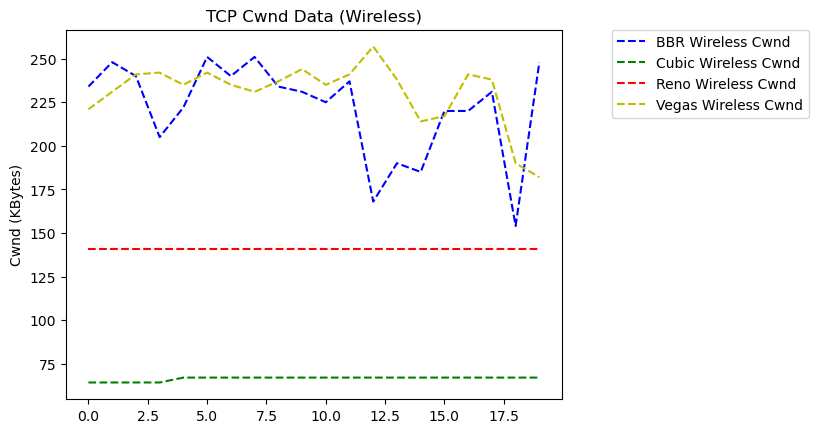

In [14]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wireless_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()


# 创建右侧的 Cwnd 轴
ax1.plot(x, wireless_bbr_Cwnd_data, 'b--', label='BBR Wireless Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax1.plot(x, wireless_cubic_Cwnd_data, 'g--', label='Cubic Wireless Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax1.plot(x, wireless_reno_Cwnd_data, 'r--', label='Reno Wireless Cwnd')  
ax1.plot(x, wireless_vegas_Cwnd_data, 'y--', label='Vegas Wireless Cwnd')  
ax1.set_ylabel('Cwnd (KBytes)', color='k')
ax1.tick_params(axis='y')

# 添加图例
# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.legend(loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad = 0.)

# 设置标题
plt.title('TCP Cwnd Data (Wireless)')

# 显示图形
plt.show()


In [15]:
wired_bbr_bandwidth_data=[205.0, 176.0, 183.0, 184.0, 211.0, 180.0, 175.0, 189.0, 195.0, 216.0, 170.0, 177.0, 189.0, 163.0, 214.0, 183.0, 186.0, 190.0, 178.0, 188.0]
wired_bbr_Cwnd_data=[160.0, 191.0, 188.0, 114.0, 151.0, 225.0, 110.0, 185.0, 220.0, 191.0, 80.0, 154.0, 157.0, 6.0, 157.0, 148.0, 188.0, 154.0, 228.0, 134.0]

wired_cubic_bandwidth_data=[190.0, 185.0, 188.0, 180.0, 167.0, 188.0, 177.0, 197.0, 184.0, 196.0, 189.0, 170.0, 203.0, 190.0, 176.0, 185.0, 191.0, 172.0, 200.0, 195.0]
wired_cubic_Cwnd_data=[65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6, 65.6]


wired_reno_bandwidth_data=[166.0, 171.0, 171.0, 173.0, 165.0, 192.0, 241.0, 232.0, 218.0, 170.0, 184.0, 232.0, 223.0, 216.0, 209.0, 220.0, 209.0, 218.0, 210.0, 203.0]
wired_reno_Cwnd_data=[138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0]


wired_vegas_bandwidth_data=[90.0, 89.7, 80.4, 77.9, 115.0, 74.8, 84.3, 82.2, 89.7, 80.9, 76.3, 103.0, 77.6, 83.2, 81.5, 91.7, 81.7, 77.8, 84.8, 76.3]
wired_vegas_Cwnd_data=[4.28, 4.28, 4.28, 4.28, 4.28, 2.85, 4.28, 4.28, 4.28, 4.28, 4.28, 4.28, 2.85, 2.85, 2.85, 4.28, 4.28, 4.28, 4.28, 4.28]

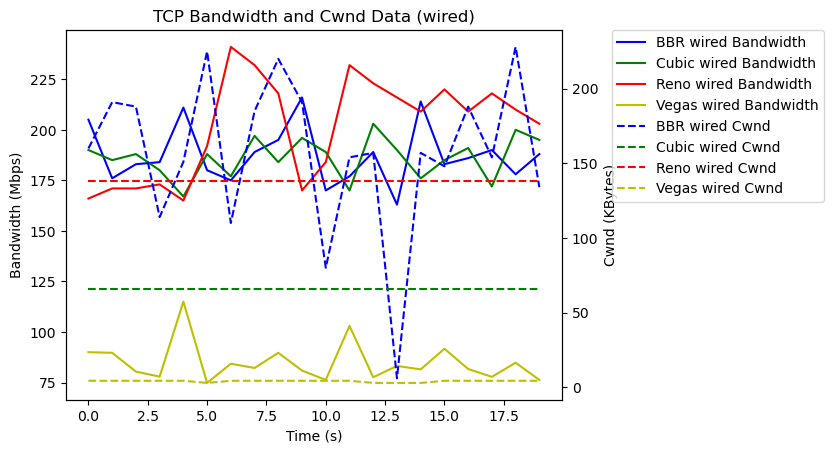

In [16]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wired_bbr_bandwidth_data, 'b-', label='BBR wired Bandwidth')
ax1.plot(x, wired_cubic_bandwidth_data, 'g-', label='Cubic wired Bandwidth')
ax1.plot(x, wired_reno_bandwidth_data, 'r-', label='Reno wired Bandwidth')
ax1.plot(x, wired_vegas_bandwidth_data, 'y-', label='Vegas wired Bandwidth')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bandwidth (Mbps)', color='k')
ax1.tick_params(axis='y')

# 创建右侧的 Cwnd 轴
ax2 = ax1.twinx()
ax2.plot(x, wired_bbr_Cwnd_data, 'b--', label='BBR wired Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wired_cubic_Cwnd_data, 'g--', label='Cubic wired Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wired_reno_Cwnd_data, 'r--', label='Reno wired Cwnd')  
ax2.plot(x, wired_vegas_Cwnd_data, 'y--', label='Vegas wired Cwnd')  
ax2.set_ylabel('Cwnd (KBytes)', color='k')
ax2.tick_params(axis='y')

# 获取 ax1 和 ax2 中的所有线条和标签
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(lines1 + lines2, labels1 + labels2, loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad=0.)

# 设置标题
plt.title('TCP Bandwidth and Cwnd Data (wired)')

# 显示图形
plt.show()


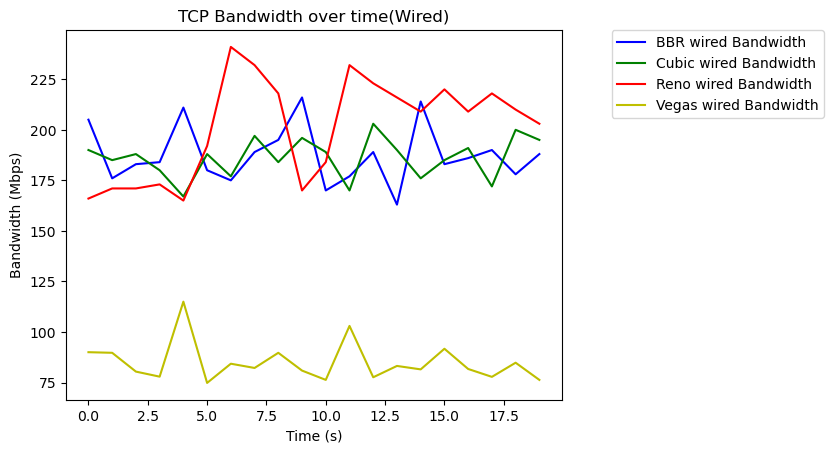

In [17]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wired_bbr_bandwidth_data, 'b-', label='BBR wired Bandwidth')
ax1.plot(x, wired_cubic_bandwidth_data, 'g-', label='Cubic wired Bandwidth')
ax1.plot(x, wired_reno_bandwidth_data, 'r-', label='Reno wired Bandwidth')
ax1.plot(x, wired_vegas_bandwidth_data, 'y-', label='Vegas wired Bandwidth')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bandwidth (Mbps)', color='k')
ax1.tick_params(axis='y')


# 添加图例
# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.legend(loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad = 0.)

# 设置标题
plt.title('TCP Bandwidth over time(Wired)')

# 显示图形
plt.show()

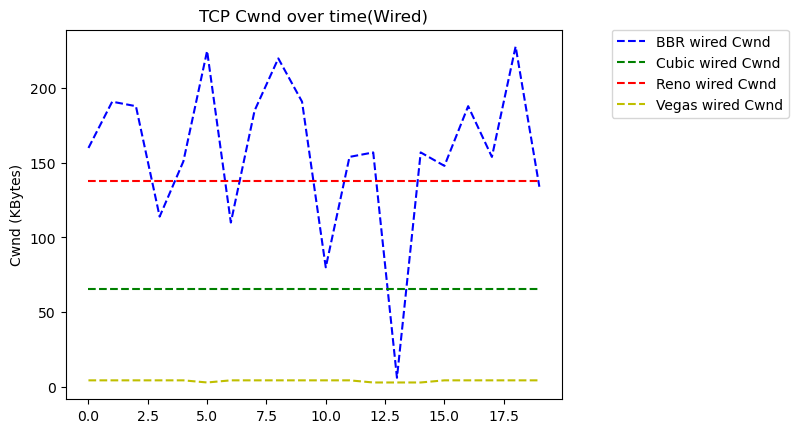

In [18]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_bbr_bandwidth_data))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()
# 创建右侧的 Cwnd 轴
ax1.plot(x, wired_bbr_Cwnd_data, 'b--', label='BBR wired Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax1.plot(x, wired_cubic_Cwnd_data, 'g--', label='Cubic wired Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax1.plot(x, wired_reno_Cwnd_data, 'r--', label='Reno wired Cwnd')  
ax1.plot(x, wired_vegas_Cwnd_data, 'y--', label='Vegas wired Cwnd')  
ax1.set_ylabel('Cwnd (KBytes)', color='k')
ax1.tick_params(axis='y')


# 添加图例
# fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.legend(loc=2, bbox_to_anchor=(1.1, 1.0), borderaxespad = 0.)

# 设置标题
plt.title('TCP Cwnd over time(Wired)')

# 显示图形
plt.show()

Time


In [19]:
wireless_rtt_bbr=[610, 917, 532, 3170, 959, 567, 1947, 639, 757, 812, 904, 374, 1054, 1149, 997, 739, 774, 2745, 818, 1644]
wireless_cwnd_bbr=[277.4, 271.56, 268.64, 242.36, 248.2, 289.08, 262.8, 246.74, 248.2, 245.28, 160.6, 259.88, 195.64, 204.4, 224.84, 230.68, 227.76, 230.68, 262.8, 251.12]

wireless_rtt_cubic=[516, 814, 1576, 1126, 1353, 770, 767, 3808, 870, 554, 2114, 1098, 956, 1925, 790, 526, 2596, 718, 505, 1066]
wireless_cwnd_cubic=[65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7, 65.7]

wireless_rtt_reno=[585, 768, 873, 822, 3335, 790, 661, 2828, 973, 1120, 778, 745, 1195, 436, 842, 841, 8583, 810, 842, 795]
wireless_cwnd_reno=[135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78, 135.78]

wireless_rtt_vegas=[558, 454, 659, 1140, 782, 718, 1238, 715, 1383, 629, 1145, 2865, 2717, 649, 1010, 401, 847, 556, 835, 1226]
wireless_cwnd_vegas=[43.8, 51.1, 62.78, 74.46, 70.08, 75.92, 84.68, 86.14, 99.28, 108.04, 116.8, 122.64, 127.02, 138.7, 146.0, 154.76, 164.98, 181.04, 188.34, 195.64]

print(len(wireless_rtt_bbr),len(wireless_cwnd_bbr))

print(len(wireless_rtt_cubic),len(wireless_cwnd_cubic))

print(len(wireless_rtt_reno),len(wireless_cwnd_reno))

print(len(wireless_rtt_vegas),len(wireless_cwnd_vegas))


20 20
20 20
20 20
20 20


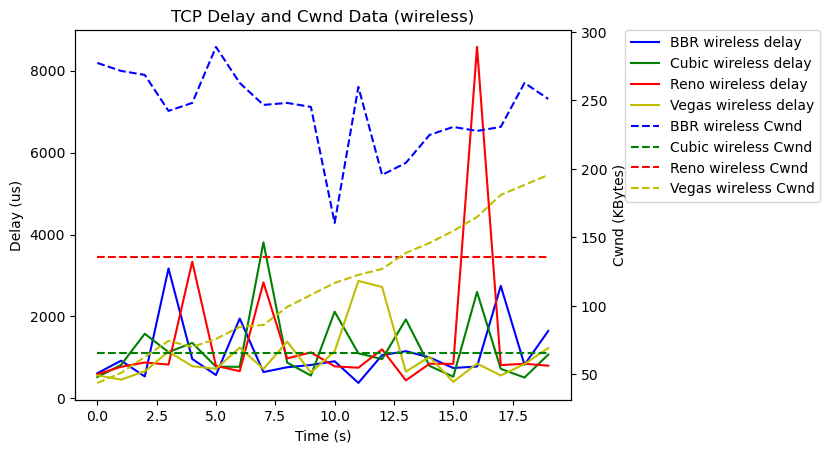

In [20]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wireless_rtt_bbr))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wireless_rtt_bbr, 'b-', label='BBR wireless delay')
ax1.plot(x, wireless_rtt_cubic, 'g-', label='Cubic wireless delay')
ax1.plot(x, wireless_rtt_reno, 'r-', label='Reno wireless delay')
ax1.plot(x, wireless_rtt_vegas, 'y-', label='Vegas wireless delay')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Delay (us)', color='k')
ax1.tick_params(axis='y')

# 创建右侧的 Cwnd 轴
ax2 = ax1.twinx()
ax2.plot(x, wireless_cwnd_bbr, 'b--', label='BBR wireless Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wireless_cwnd_cubic, 'g--', label='Cubic wireless Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wireless_cwnd_reno, 'r--', label='Reno wireless Cwnd')  
ax2.plot(x, wireless_cwnd_vegas, 'y--', label='Vegas wireless Cwnd')  
ax2.set_ylabel('Cwnd (KBytes)', color='k')
ax2.tick_params(axis='y')

# 获取 ax1 和 ax2 中的所有线条和标签
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(lines1 + lines2, labels1 + labels2, loc=2, bbox_to_anchor=(1.11, 1.0), borderaxespad=0.)

# 设置标题
plt.title('TCP Delay and Cwnd Data (wireless)')

# 显示图形
plt.show()


In [21]:
wired_rtt_bbr=[3006, 3827, 1542, 1288, 2312, 1733, 3115, 4205, 4096, 1806, 2426, 3196, 2018, 6220, 2092, 2369, 3282, 3433, 1950, 2129]
wired_cwnd_bbr=[163.52, 105.12, 210.24, 122.64, 262.8, 236.52, 157.68, 128.48, 151.84, 157.68, 251.12, 148.92, 166.44, 169.36, 183.96, 172.28, 172.28, 68.62, 166.44, 201.48]

wired_rtt_cubic=[1456, 2150, 1517, 1682, 1633, 1193, 2367, 1977, 2361, 6190, 1187, 3545, 1600, 1553, 1508, 2939, 3908, 2759, 3135, 1612]
wired_cwnd_cubic=[189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8, 189.8]

wired_rtt_reno=[5254, 2673, 2637, 4265, 2665, 2712, 1643, 3152, 3602, 2518, 1643, 2944, 2379, 4592, 1348, 2218, 2100, 1820, 1744, 5342]
wired_cwnd_reno=[128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48, 128.48]

wired_rtt_vegas=[374, 421, 399, 611, 840, 539, 351, 346, 365, 407, 420, 390, 494, 470, 468, 430, 421, 270, 397, 386]
wired_cwnd_vegas=[7.3, 4.38, 5.84, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 4.38, 2.92, 4.38, 2.92, 4.38, 4.38, 5.84, 2.92, 4.38]

print(len(wired_rtt_bbr),len(wired_cwnd_bbr))

print(len(wired_rtt_cubic),len(wired_cwnd_cubic))

print(len(wired_rtt_reno),len(wired_cwnd_reno))

print(len(wired_rtt_vegas),len(wired_cwnd_vegas))

20 20
20 20
20 20
20 20


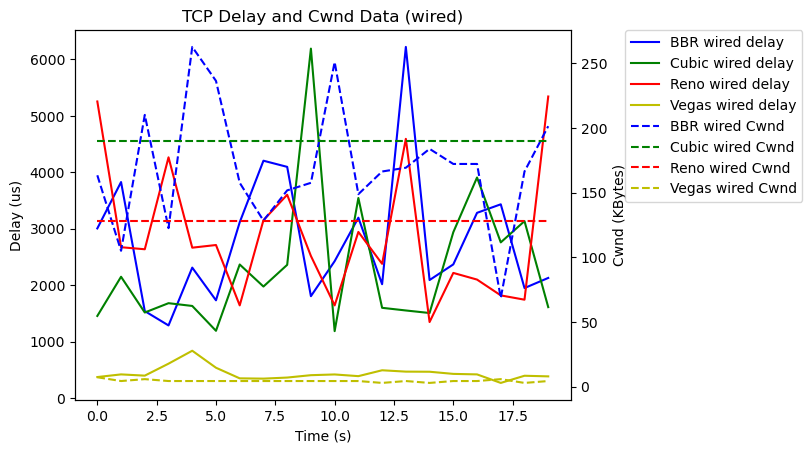

In [22]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_rtt_bbr))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wired_rtt_bbr, 'b-', label='BBR wired delay')
ax1.plot(x, wired_rtt_cubic, 'g-', label='Cubic wired delay')
ax1.plot(x, wired_rtt_reno, 'r-', label='Reno wired delay')
ax1.plot(x, wired_rtt_vegas, 'y-', label='Vegas wired delay')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Delay (us)', color='k')
ax1.tick_params(axis='y')

# 创建右侧的 Cwnd 轴
ax2 = ax1.twinx()
ax2.plot(x, wired_cwnd_bbr, 'b--', label='BBR wired Cwnd')  # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wired_cwnd_cubic, 'g--', label='Cubic wired Cwnd')        # 虚线与 bandwidth 保持相同颜色
ax2.plot(x, wired_cwnd_reno, 'r--', label='Reno wired Cwnd')  
ax2.plot(x, wired_cwnd_vegas, 'y--', label='Vegas wired Cwnd')  
ax2.set_ylabel('Cwnd (KBytes)', color='k')
ax2.tick_params(axis='y')

# 获取 ax1 和 ax2 中的所有线条和标签
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(lines1 + lines2, labels1 + labels2, loc=2, bbox_to_anchor=(1.11, 1.0), borderaxespad=0.)

# 设置标题
plt.title('TCP Delay and Cwnd Data (wired)')

# 显示图形
plt.show()


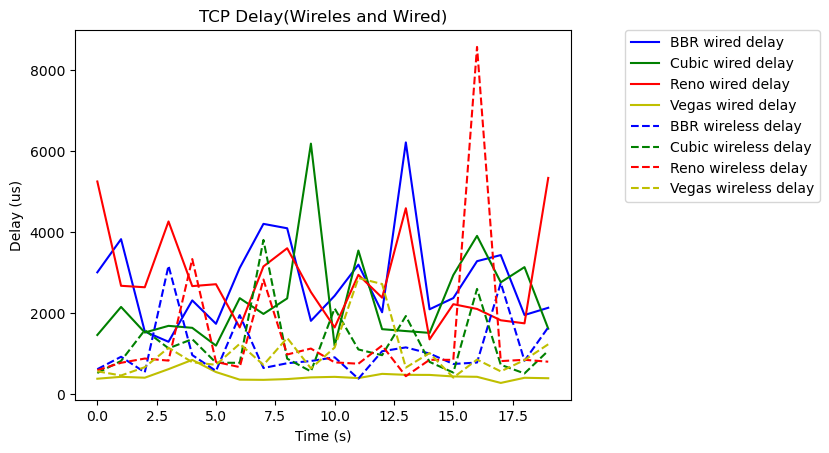

In [23]:
import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_rtt_bbr))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wired_rtt_bbr, 'b-', label='BBR wired delay')
ax1.plot(x, wired_rtt_cubic, 'g-', label='Cubic wired delay')
ax1.plot(x, wired_rtt_reno, 'r-', label='Reno wired delay')
ax1.plot(x, wired_rtt_vegas, 'y-', label='Vegas wired delay')
ax1.plot(x, wireless_rtt_bbr, 'b--', label='BBR wireless delay')
ax1.plot(x, wireless_rtt_cubic, 'g--', label='Cubic wireless delay')
ax1.plot(x, wireless_rtt_reno, 'r--', label='Reno wireless delay')
ax1.plot(x, wireless_rtt_vegas, 'y--', label='Vegas wireless delay')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Delay (us)', color='k')
ax1.tick_params(axis='y')



# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.11, 1.0), borderaxespad=0.)

# 设置标题
plt.title('TCP Delay(Wireles and Wired)')

# 显示图形
plt.show()


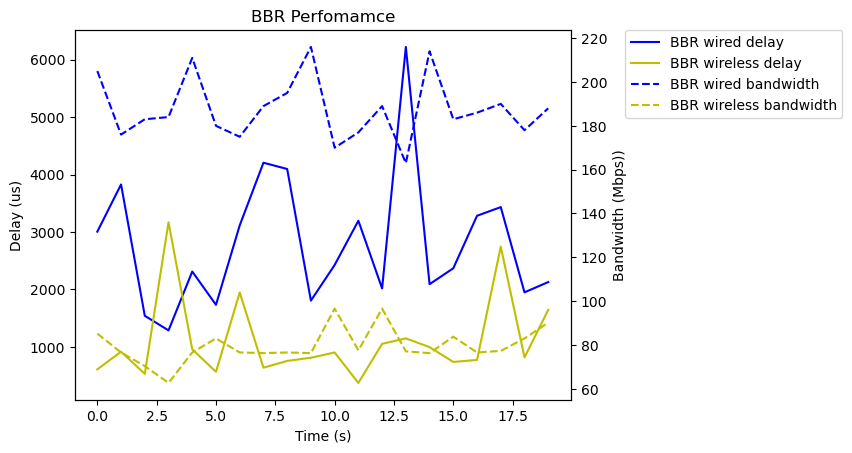

In [28]:

import matplotlib.pyplot as plt

# 创建x轴数据
x = range(len(wired_rtt_bbr))

# 创建图形和左侧的 bandwidth 轴
fig, ax1 = plt.subplots()

# 绘制无线和有线的 bandwidth 数据（左侧轴）
ax1.plot(x, wired_rtt_bbr, 'b-', label='BBR wired delay')
ax1.plot(x, wireless_rtt_bbr, 'y-', label='BBR wireless delay')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Delay (us)', color='k')
ax1.tick_params(axis='y')

# 创建右侧的 Cwnd 轴
ax2 = ax1.twinx()
ax2.plot(x, wired_bbr_bandwidth_data, 'b--', label='BBR wired bandwidth')
ax2.plot(x, wireless_bbr_bandwidth_data, 'y--', label='BBR wireless bandwidth')
ax2.set_ylabel('Bandwidth (Mbps))', color='k')
ax2.tick_params(axis='y')

# 获取 ax1 和 ax2 中的所有线条和标签
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 将所有线条和标签合并在一起传递给 plt.legend()
plt.legend(lines1 + lines2, labels1 + labels2, loc=2, bbox_to_anchor=(1.11, 1.0), borderaxespad=0.)


# 设置标题
plt.title('BBR Perfomamce')

# 显示图形
plt.show()
